### Import libraries

In [104]:

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


##### creating the torch dataset

In [106]:
class IrisDataset(Dataset):
    def __init__(self, features, labels):

        # Convert data to PyTorch tensors
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    
    def __len__(self):
        """Return the size of the dataset."""
        return len(self.features)
    
    def __getitem__(self, idx):
        """Retrieve the features and label at the given index."""
        return self.features[idx], self.labels[idx]
    
    
iris = datasets.load_iris()
# Features (X) and Labels (y)
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (0, 1, 2) corresponding to three classes
iris_dataset = IrisDataset(X, y)

y_label = {
    0 : "setosa", 
    1 : "versicolor", 
    2 : "virginica"
}

##### Create a DataLoader for the dataset

In [107]:
batch_size = 16  # You can adjust this to any size you want

# Use the DataLoader to handle batching and shuffling
iris_loader = DataLoader(iris_dataset, batch_size=batch_size, shuffle=True)

# Example of iterating over DataLoader
for batch_features, batch_labels in iris_loader:
    print(batch_features)  # Tensor containing a batch of features
    print(batch_labels)    # Tensor containing the corresponding labels
    break  # Just print one batch for demo purposes


tensor([[6.3000, 2.8000, 5.1000, 1.5000],
        [6.2000, 2.8000, 4.8000, 1.8000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [6.7000, 3.0000, 5.0000, 1.7000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [6.6000, 2.9000, 4.6000, 1.3000],
        [5.0000, 3.0000, 1.6000, 0.2000],
        [5.0000, 2.0000, 3.5000, 1.0000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.0000, 2.2000, 4.0000, 1.0000]])
tensor([2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])


##### important feature selection and visualization

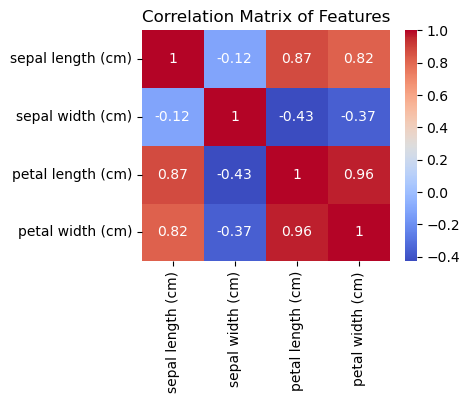

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = pd.DataFrame(X, columns=iris.feature_names).corr()

# Plot heatmap of correlations
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

##### Train-test split 80-20

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

#### I will use three famous ML models for my dataset traning

##### 1. Logistic Regression

In [110]:
logreg = LogisticRegression(max_iter=1000)  # Increased iterations
logreg.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
logreg_test_score = logreg.score(X_test_scaled, y_test)

print(f"Logistic Regression Test Accuracy: {logreg_test_score*100:.2f}%")

Logistic Regression Test Accuracy: 100.00%


##### 2. K-NN

In [111]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train_scaled, y_train)
knn_test_score = knn.score(X_test_scaled, y_test)

print(f"K-NN Test Accuracy: {knn_test_score*100:.2f}%")

K-NN Test Accuracy: 100.00%


##### 3. Decision tree

In [112]:
tree = DecisionTreeClassifier()

tree.fit(X_train_scaled, y_train)
tree_test_score = tree.score(X_test_scaled, y_test)

print(f"Decision tree Test Accuracy: {tree_test_score*100:.2f}%")

Decision tree Test Accuracy: 100.00%


#### Model evaluation with cross validation

In [113]:
cv = 10  #Cross validation

logreg_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=cv)
print(f"Logistic Regression Accuracy: {logreg_scores.mean()*100:.2f}%")

knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv)
print(f"k-NN Accuracy: {knn_scores.mean()*100:.2f}%")

tree_scores = cross_val_score(tree, X_train_scaled, y_train, cv=cv)
print(f"Decision Tree Accuracy: {tree_scores.mean()*100:.2f}%")

Logistic Regression Accuracy: 93.33%
k-NN Accuracy: 94.17%
Decision Tree Accuracy: 92.50%


##### after all the cross validation, I have selected the knn, now I will save the model to predict these flower

In [120]:
import joblib

# # Save the trained k-NN model to a file
joblib.dump(knn, 'knn_model.pkl')

scaler.fit(X_train)
joblib.dump(scaler, 'scaler.pkl')

# #load the model for future use
knn_loaded = joblib.load('knn_model.pkl')

##### predicting a new flower species

In [118]:
new_flower = []
user_inputs = []

sepal_l = float(input("Please give the sepal lenght of the flower"))
user_inputs.append(sepal_l)
sepal_w = float(input("Please give the sepal width of the flower"))
user_inputs.append(sepal_w)
petal_l = float(input("Please give the petal lenght of the flower"))
user_inputs.append(petal_l)
petal_w = float(input("Please give the petal width of the flower"))
user_inputs.append(petal_w)

new_flower.append(user_inputs)
new_flower_scaled = scaler.transform(new_flower)

# Predict the species of the new flower
predicted_species = logreg.predict(new_flower_scaled)
print(f"Predicted species: {y_label[predicted_species[0]]}")

Predicted species: versicolor
